### Importing Needed Packages


In [35]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

### Loading the CSV

In [36]:
df = pd.read_csv("winequality-red.csv")
df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


### Data Exploration

Let's first have a descriptive exploration on our data.

In [37]:
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Let's select some features that have a certain relationship.


In [94]:
cdf = df[['fixed_acidity','residual_sugar','total_sulfur_dioxide','volatile_acidity','quality']]
cdf.head(9)

,fixed_acidity,residual_sugar,total_sulfur_dioxide,volatile_acidity,quality
0,7.4,1.9,34.0,0.70,5
1,7.8,2.6,67.0,0.88,5
2,7.8,2.3,54.0,0.76,5
3,11.2,1.9,60.0,0.28,6
4,7.4,1.9,34.0,0.70,5
5,7.4,1.8,40.0,0.66,5
6,7.9,1.6,59.0,0.60,5
7,7.3,1.2,21.0,0.65,7
8,7.8,2.0,18.0,0.58,7


Plots of each of these features 

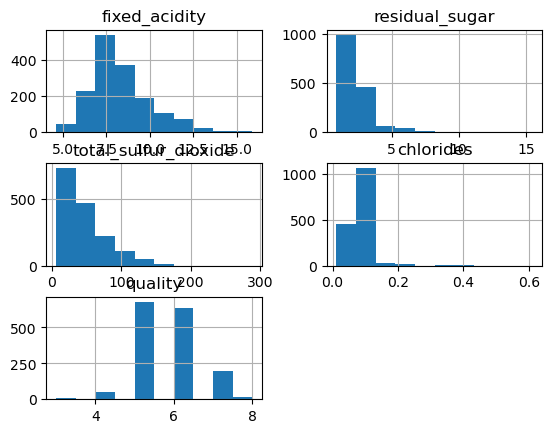

In [95]:
grp = df[['fixed_acidity','residual_sugar','total_sulfur_dioxide','chlorides','quality']]
grp.hist()
plt.show()

Now, let's plot each of these features against the quality, to see how linear their relationship is:


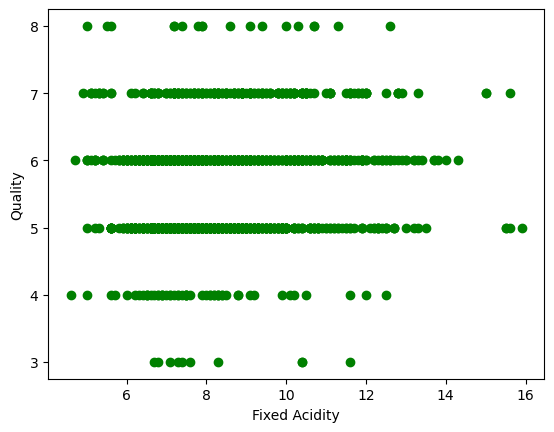

In [98]:
plt.scatter(df.fixed_acidity, df.quality, color = 'green')
plt.xlabel("Fixed Acidity")
plt.ylabel("Quality")
plt.show()

### Cleaning and testing
We'll use the Train/Test Split model to train and test our data
Let's split our dataset into train and test sets. 80% of the entire dataset will be used for training and 20% for testing. We create a mask to select random rows using np.random.rand() function:

In [131]:
mask = np.random.rand(len(df)) < 0.8
train = grp[mask]
test = grp[~mask]

### Simple Regression Model
#### Train data distribution


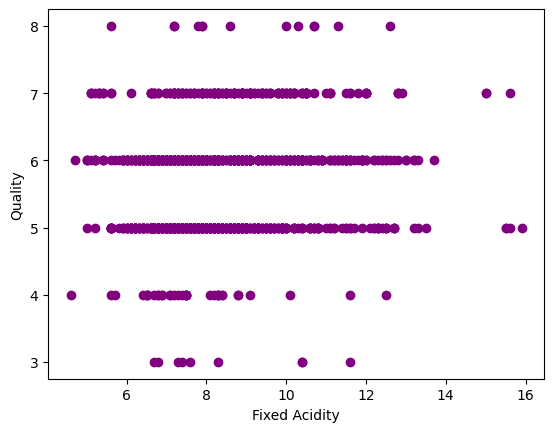

In [132]:
plt.scatter(train.fixed_acidity, train.quality, color = 'purple')
plt.xlabel("Fixed Acidity")
plt.ylabel("Quality")
plt.show()

#### Modeling

Using sklearn package to model data.

In [133]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
train_x = np.asanyarray(train[["fixed_acidity"]])
train_y = np.asanyarray(train[["quality"]])
reg.fit(train_x,train_y)
# The coefficients
print ('Coefficients: ', reg.coef_)
print ('Intercept: ',reg.intercept_)

Coefficients:  [[0.05684811]]
Intercept:  [5.16378406]


#### Interpretation 



In [134]:
covariance = grp['fixed_acidity'].cov(grp['quality'])
covariance

0.17442358764590832

We notice that the covarience beetween the two features is postive, which means that they have a direct relation, hence we can say that as the fixed acidity increases, the quality of the wine also

In [135]:
correlation = grp['fixed_acidity'].corr(grp['quality'])
correlation

0.12405164911322425

This suggests a weak positive correlation between the variables. This means that there is a positive relationship between the two variables, but the strength of this relationship is relatively weak.

As mentioned before, Coefficient and Intercept in the simple linear regression, are the parameters of the fit line. Given that it is a simple linear regression, with only 2 parameters, and knowing that the parameters are the intercept and slope of the line, sklearn can estimate them directly from our data. Notice that all of the data must be available to traverse and calculate the parameters.


#### Plot outputs
We can plot the fit line over the data:


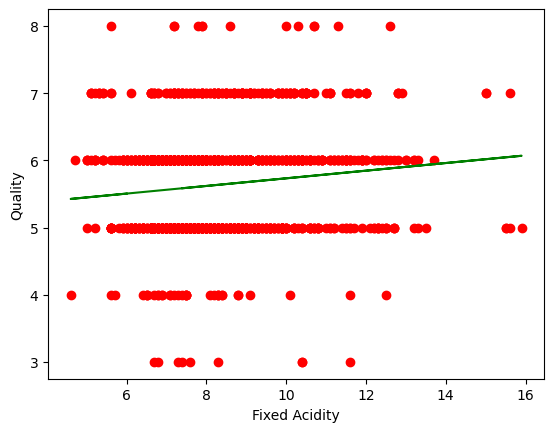

In [136]:
plt.scatter(train.fixed_acidity, train.quality, color = 'red')
plt.xlabel("Fixed Acidity")
plt.ylabel("Quality")
plt.plot(train_x, reg.coef_[0][0]*train_x + reg.intercept_[0], '-g')
plt.show()

We can appreciate that the relation beetween the two features are almost nil

#### Evaluation

We compare the actual values and predicted values to calculate the accuracy of a regression model. Evaluation metrics provide a key role in the development of a model, as it provides insight to areas that require improvement.

There are different model evaluation metrics, lets use MSE here to calculate the accuracy of our model based on the test set:

*   Mean Absolute Error: It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just average error.

*   Mean Squared Error (MSE): Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean Absolute Error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones.

*   Root Mean Squared Error (RMSE).

*   R-squared is not an error, but rather a popular metric to measure the performance of your regression model. It represents how close the data points are to the fitted regression line. The higher the R-squared value, the better the model fits your data. The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).


In [137]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['quality']])
test_y = np.asanyarray(test[['fixed_acidity']])
test_y_= reg.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 2.96
Residual sum of squares (MSE): 11.85
R2-score: -2.72
